# PROJECT 02 : SHARK ATTACKS
-----

### BRIEF : data analysis of global shark attacks for a business idea
You will initially examine the Shark Attack dataset, understanding its structure and formulating a hypothesis or several hypotheses about the data. 
 We hypothesize that shark attacks are more common in certain locations and peak during specific months.
We define a Business Case, such as 

* “As a company that sells medical products, I want to identify destinations with high shark attack rates.”
* “As a company providing supply transportation services, I want to know when and where shark attacks peak to plan the safe transport of medical supplies to hospitals.”

 Throughout the project, we will use Python and the pandas library to apply at least five data cleaning techniques to handle missing values, duplicates, and formatting inconsistencies. After cleaning, we will perform basic exploratory data analysis to validate our hypotheses and extract insights. 

#### 📝 BUSINESS IDEA — 3 Bullet Points

* Problem to Solve: Coastal hospitals and emergency response teams are not always prepared with the right medical supplies during periods of high shark-attack frequency. This business solves the problem by predicting when and where attacks are most likely, so medical supplies can be stocked in advance.

* Business Concept: Use historical shark attack data to create global heatmaps and seasonal risk forecasts. Then provide pharmaceutical products (painkillers, antibiotics, blood bags, emergency kits) and transportation support to hospitals and ambulances near high-risk beaches.

* Data Used to Profit: The business will analyze Country, Date/Month, Gender, Age, Fatality, and Type of Injury to identify high-risk locations, peak attack months, and most common injury types. This allows optimized supply production, targeted sales, and efficient delivery to the areas that need it most.



## 🌀COLUMNS TO CLEAN : 
-----

**- COUNTRY (global comparison between countries to invest in more)** @Blanca

    * we just take the country column and make sure every country name is accurately named
    * We are gonna check the column of COUNTRY and make sure every country name is correct
    * We remove NULL COUNTRY data rows that dont have any country
    * We need to make sure that the name of COUNTRY  is capitalized and written the same way for example :
        United States of Amercia == USA == US
        it has to have the same name and consistent!

**- DATE ( MONTH + YEAR )** @Blanca

    * split the date into day - month columns and only use month column
    * interpret months which have shark attacks happen the most

**- GENDER ( F or M )** @Cecilia

    * We check unique values and make it so it is only two values F or M and deleted all rows that have other values
    * we noticed mostly M get attacked
    * percentages Male to Female victims
    * We remove NULL DATE data rows that dont have a date or that the date doesnt include a month and a year
    * We are gonna check the column of DATE and seperate it into three columns DAY + MONTH + YEAR
    * We verify that the new YEAR column matches with the old YEAR column and keep the ones that match
        * NEW YEAR COLUMN is the one split from the DATE column
        * OLD YEAR COLUMN is the one already existing in the original sheet
    * Once we finish comparing the new YEAR column vs old YEAR column and we find them not matching on some data rows. we remove the none matching ones so we keep clean data of accurate years
    * We remove the DAY and OLD YEAR columns
    * We are gonna keep the MONTH and matching YEAR

**- AGE (victims age ranges)** @Samia

    * majority of victims survive
    * we split the age groups into three categories (minors under 18 / adults 18-40 and 40+) 
    * keep in mind complications depending on age when getting treated
    * percentages of victims based on age ranges
    * we split the age groups into three categories (minors under 18 / adults 18-40 and elders 40+) 
    * note that there are complications depending on age

**- FATALITY ( Y or N )** @Cecilia
    * depends on the column 'Type' of injury and if it includes death or high severity
    * mostly survived 
    * for the pharamaceutical logistics & transportation of injured people to the hospital
    * assumption we have a percentage of survivals highest and we use it to sell for the
    * We check unique values and make sure it is only two values Y or N and deleted all rows that have other values
    * assumption we have a high percentage of survivals and we use it to sell the idea to profit from selling products to hospitals

**- INJURY TYPE** @Samia

    * clean the type of injury by severity
    * seperate the injury type into different severity
    * seperate the injury type into different body parts
    * treatment depends on type of injury and thus the supplies as well

-------



### IMPORT UTILS and INIT from SRC

In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))
from src import utils
from src import init

-----
### GENERAL

In [3]:
import pandas as pd

# Load the CSV
url = 'https://drive.google.com/uc?export=download&id=1ZRuzHohahE54BC7hKcA289tyuL9cp7-h'
df = pd.read_csv(url)
df.head(3)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,25 Aug 2023,2023.0,Unprovoked,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF"
1,21 Aug-2023,2023.0,Questionable,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,20/30,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023"
2,07-Jun-2023,2023.0,Unprovoked,BAHAMAS,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF"


In [4]:

# Option 1: Display the entire DataFrame (all rows and columns)
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns

#the full table
#print(df)  

In [5]:
df.info()
# change type of each serie
# year into int or split it from Date
# Age into int


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       561 non-null    object 
 1   Year       560 non-null    float64
 2   Type       557 non-null    object 
 3   Country    556 non-null    object 
 4   State      508 non-null    object 
 5   Location   503 non-null    object 
 6   Activity   433 non-null    object 
 7   Name       502 non-null    object 
 8   Sex        480 non-null    object 
 9   Age        238 non-null    object 
 10  Injury     553 non-null    object 
 11  Fatal Y/N  0 non-null      float64
 12  Time       157 non-null    object 
 13  Species    526 non-null    object 
 14  Source     556 non-null    object 
dtypes: float64(2), object(13)
memory usage: 65.9+ KB


In [6]:
print("\nData Frame SHAPE", df.shape)

print("\nData Columns")
df.columns


Data Frame SHAPE (561, 15)

Data Columns


Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

-----
### 'Country' CLEANING

In [7]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [8]:
df['Country']

0                       AUSTRALIA
1                         BAHAMAS
2                         BAHAMAS
3                      SEYCHELLES
4                       ARGENTINA
5                      COSTA RICA
6                          BRAZIL
7                       AUSTRALIA
8                           EGYPT
9                       AUSTRALIA
10                      AUSTRALIA
11                      AUSTRALIA
12               FRENCH POLYNESIA
13                      AUSTRALIA
14                            USA
15                        BAHAMAS
16                            USA
17                       COLOMBIA
18                         BRAZIL
19                   SOUTH AFRICA
20                            USA
21                   SOUTH AFRICA
22                          SPAIN
23                            USA
24                            USA
25                        COMOROS
26                            USA
27                            USA
28                            USA
29            

In [9]:
df['Country'].nunique()
df['Country'].unique()

array(['AUSTRALIA', 'BAHAMAS', 'SEYCHELLES', 'ARGENTINA', 'COSTA RICA',
       'BRAZIL', 'EGYPT', 'FRENCH POLYNESIA', 'USA', 'COLOMBIA',
       'SOUTH AFRICA', 'SPAIN', 'COMOROS', 'MEXICO', 'CAPE VERDE',
       'CAYMAN ISLANDS', 'ITALY', nan, 'JAMAICA', 'TRINIDAD & TOBAGO',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'ANTIGUA',
       'UNITED ARAB EMIRATES (UAE)', 'GUAM', 'NEVIS', 'JAPAN',
       'NEW ZEALAND', 'BRITISH VIRGIN ISLANDS', 'SENEGAL', 'BELIZE',
       'Seychelles', 'LIBERIA', 'HONDURAS', 'SRI LANKA', 'INDONESIA',
       'NEW CALEDONIA', 'MADAGASCAR', 'MALAYSIA', 'TONGA', 'BERMUDA',
       'MONTENEGRO', 'SOMALIA', 'GREECE', 'MOZAMBIQUE',
       'PAPUA NEW GUINEA', 'TANZANIA', 'PANAMA', 'PHILIPPINES',
       'ATLANTIC OCEAN', 'JOHNSTON ISLAND', 'MARSHALL ISLANDS',
       'CARIBBEAN SEA', 'TURKEY', 'CUBA', 'GUATEMALA',
       'NORTH ATLANTIC OCEAN', 'NORTH PACIFIC OCEAN', 'PACIFIC OCEAN',
       'INDIAN OCEAN', 'UNITED KINGDOM', 'ISRAEL', 'ITALY / CROATIA',
       'INDIA', 'H

In [10]:
# COUNTRY

df = df.dropna(subset=["Country"])
df["Country"] = df["Country"].str.strip().str.title()

country_replacements = {
    "United States Of America": "USA",
    "Usa": "USA",
    "Us": "USA",
    "U.s.": "USA",
    "United Kingdom": "UK",
    "England": "UK",
    "Uk":"UK",
    "Brasil": "Brazil",
    "México": "Mexico",
    "United Arab Emirates (Uae)": "UAE",
    "Turkey":"Türkiye"
}

df["Country"] = df["Country"].replace(country_replacements)
df = df[df["Country"] != "Italy / Croatia"]

df["Country"].describe()

count     555
unique     75
top       USA
freq      191
Name: Country, dtype: object

In [11]:
df['Country'].unique()

array(['Australia', 'Bahamas', 'Seychelles', 'Argentina', 'Costa Rica',
       'Brazil', 'Egypt', 'French Polynesia', 'USA', 'Colombia',
       'South Africa', 'Spain', 'Comoros', 'Mexico', 'Cape Verde',
       'Cayman Islands', 'Italy', 'Jamaica', 'Trinidad & Tobago',
       'Canada', 'Croatia', 'Saudi Arabia', 'Antigua', 'UAE', 'Guam',
       'Nevis', 'Japan', 'New Zealand', 'British Virgin Islands',
       'Senegal', 'Belize', 'Liberia', 'Honduras', 'Sri Lanka',
       'Indonesia', 'New Caledonia', 'Madagascar', 'Malaysia', 'Tonga',
       'Bermuda', 'Montenegro', 'Somalia', 'Greece', 'Mozambique',
       'Papua New Guinea', 'Tanzania', 'Panama', 'Philippines',
       'Atlantic Ocean', 'Johnston Island', 'Marshall Islands',
       'Caribbean Sea', 'Türkiye', 'Cuba', 'Guatemala',
       'North Atlantic Ocean', 'North Pacific Ocean', 'Pacific Ocean',
       'Indian Ocean', 'UK', 'Israel', 'India', 'Haiti', 'Yemen', 'Crete',
       'France', 'Syria', 'Azores', 'Fiji', 'Guyana', 'China'

In [12]:
top_countries = df['Country'].value_counts().head(10)
print(top_countries)
# PIE CHART FOR COUNTRIES WITH HIGHEST SHARK ATTACKS

Country
USA             191
Australia       120
South Africa     64
Italy            14
New Zealand      12
Mexico           11
Spain            10
Brazil            9
Bahamas           8
Croatia           8
Name: count, dtype: int64


In [13]:
# Save COUNTRY CLEANED file
df.to_csv("../data/interim/1_interim_country.csv", index=False)

-----
### 'Sex' CLEANING

In [14]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [15]:
df['Sex']

0        M
1        M
2        F
3        M
4        M
5        F
6        M
7        M
8        M
9      NaN
10       F
11     NaN
12       F
13       F
14     NaN
15       M
16       F
17       M
18       M
19       M
20       M
21       M
22       F
23       M
24       F
25     NaN
26       M
27       F
28       F
29       M
30       M
31       M
32       M
33       M
34       M
35     NaN
36       M
37       M
38       M
39       M
40       M
41     NaN
42       M
43       M
44       F
45       M
46       M
47       M
48       M
49       F
50       M
51       M
52       F
53       M
54       M
55       F
56       M
57     NaN
58       M
59     NaN
61       M
62       M
63       M
64       F
65       M
66       F
67       M
68       M
69       M
70       M
71       M
72       M
73       M
74       M
75       M
76       M
77       F
78       F
79     NaN
80       M
81       M
82       M
83       M
84     NaN
85       M
86       M
87       M
88       M
89       M
90       F
91       F

In [16]:
# NaN , F, M
df['Sex'].value_counts(dropna=False)

Sex
M      411
NaN     80
F       64
Name: count, dtype: int64

In [17]:

df['Sex'] = df['Sex'].replace({
    'm' : 'M', 
    'f' : 'F', 
    'Male' : 'M', 
    'Female' : 'F'})

df['Sex'] = df['Sex'].str.upper()

In [18]:

df.dropna (subset = ['Sex'], inplace= True)
df['Sex'].value_counts(dropna=False)

Sex
M    411
F     64
Name: count, dtype: int64

In [19]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [20]:
df.columns.to_list()

['Date',
 'Year',
 'Type',
 'Country',
 'State',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal Y/N',
 'Time',
 'Species ',
 'Source']

In [21]:
df.shape

(475, 15)

In [22]:
df['Sex'].describe().round(2)

count     475
unique      2
top         M
freq      411
Name: Sex, dtype: object

In [23]:
# Save COUNTRY CLEANED file
df.to_csv("../data/interim/2_interim_sex.csv", index=False)

-----
### 'Age' CLEANING

In [24]:
df['Age'].info()
#238 non-null object

<class 'pandas.core.series.Series'>
Index: 475 entries, 0 to 560
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
233 non-null    object
dtypes: object(1)
memory usage: 7.4+ KB


In [25]:
df['Age'].unique()

array(['44', '20/30', '73', '6', '32', '50', '11', '26', nan, '35', '62',
       '34', '31', '33', '25', '10', '8', '18', '68', '20', '19', '27',
       '60', 'Teen', '65', '9', '40', '39', '43', '23', '38', '63', '47',
       '48', '42', '24', '12', '16', '14', '7', '49', '17', '52', '53',
       '45', '36', '54', '51', '22', '28', '56', '8 or 10', '75',
       '23 & 20', '37', '29', '21', '15', '30', '16 to 18', '67', '77',
       'mid-20s', 'Ca. 33', '? & 19', '46', '37, 67, 35, 27,  ? & 27',
       '21, 34,24 & 35', '34 & 19', '13', '5', '1'], dtype=object)

In [26]:
df['Age'].nunique()

71

In [27]:
import pandas as pd
import numpy as np
import re

# Load CSV
df = pd.read_csv(url)

def clean_age(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()

    # Remove common unwanted characters
    value = value.replace("years", "").replace("ca.", "").replace("about", "").strip()

    # Words that indicate no age
    if value in ["n/a", "na", "none", "?", "", "unknown"]:
        return np.nan

    # Teen keyword (assume average age 15)
    if "teen" in value:
        return 15

    # mid-20s -> 25
    if "mid" in value and "20" in value:
        return 25

    # Capture numbers if present
    nums = re.findall(r"\d+", value)

    if len(nums) == 1:
        return int(nums[0])
    
    # If multiple numbers like "20/30", "24 & 35", "16 to 18", take the average
    if len(nums) >= 2:
        nums = [int(n) for n in nums]
        return sum(nums) / len(nums)

    return np.nan

# Apply cleaning function
df['Age_clean'] = df['Age'].apply(clean_age)

# Convert to numeric properly
df['Age_clean'] = pd.to_numeric(df['Age_clean'], errors='coerce')

# Fill missing values with median
median_age = df['Age_clean'].median()
df['Age_clean'].fillna(median_age, inplace=True)

# Replace the values in 'Age' with those in 'Age_clean'
df['Age'] = df['Age_clean']

# Drop the 'Age_clean' column
df.drop(columns=['Age_clean'], inplace=True)

# Confirm results
print(df['Age'].head(5))
print("Median age used:", median_age)

# (Optional) Save cleaned file
df.to_csv(r"C:\Users\sboub\Documents\GitHub\02_project-shark-attacks\data\clean.csv", index=False)


0    44.0
1    25.0
2    73.0
3     6.0
4    32.0
Name: Age, dtype: float64
Median age used: 26.0


C:\Users\sboub\AppData\Local\Temp\ipykernel_21360\1912699362.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_clean'].fillna(median_age, inplace=True)


In [28]:
df['Age'].describe().round().astype(int)

count    561
mean      27
std       10
min        1
25%       26
50%       26
75%       26
max       77
Name: Age, dtype: int64

In [29]:
import pandas as pd
import numpy as np
import re

# DATA .csv
df = pd.read_csv(url)
# def Function : clean_age(value=age)
def clean_age(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()

    # Remove useless text
    value = value.replace("years", "").replace("year", "").replace("ca.", "").replace("about", "").strip()

    # Words meaning no age
    if value in ["n/a", "na", "none", "?", "", "unknown"]:
        return np.nan

    # Teen keyword (approx.)
    if "teen" in value:
        return 15

    # mid-20s → 25
    if "mid" in value and "20" in value:
        return 25

    # Extract numbers
    nums = re.findall(r"\d+", value)

    # Single number
    if len(nums) == 1:
        return int(nums[0])
    
    # Multiple numbers -> average them (20/30, 23 & 20, 16 to 18)
    if len(nums) >= 2:
        nums = [int(n) for n in nums]
        return sum(nums) / len(nums)

    return np.nan

# Apply cleaner
df['Age_clean'] = df['Age'].apply(clean_age)

# Convert to numeric
df['Age_clean'] = pd.to_numeric(df['Age_clean'], errors='coerce')

# Fill missing with median
median_age = df['Age_clean'].median()
df['Age_clean'].fillna(median_age, inplace=True)

# Convert to integer (no floats)
df['Age_clean'] = df['Age_clean'].round().astype(int)

# Show result
print(df[['Age', 'Age_clean']].head(20))
print("Median age used:", median_age)

df['Age'] = df['Age_clean']

# Check result
print("\n",df["Age"].value_counts())

      Age  Age_clean
0      44         44
1   20/30         25
2      73         73
3       6          6
4      32         32
5      50         50
6      11         11
7      26         26
8     NaN         26
9     NaN         26
10    NaN         26
11    NaN         26
12     35         35
13    NaN         26
14    NaN         26
15     50         50
16    NaN         26
17     62         62
18     34         34
19     31         31
Median age used: 26.0

 Age
26    328
17     15
20      9
25      8
43      8
24      8
32      7
21      7
19      7
18      7
22      7
11      6
23      6
31      6
27      6
36      6
9       5
40      5
10      5
28      5
35      5
14      5
39      4
49      4
44      4
45      4
52      4
12      4
53      3
37      3
7       3
29      3
30      3
47      3
42      3
15      3
50      3
33      3
34      3
62      2
60      2
68      2
8       2
51      2
63      2
16      2
13      2
38      2
48      2
6       2
77      1
5       1
2       1
4

C:\Users\sboub\AppData\Local\Temp\ipykernel_21360\2878044565.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_clean'].fillna(median_age, inplace=True)


In [30]:
df['Age'].describe().round(2)

count    561.00
mean      27.47
std       10.18
min        1.00
25%       26.00
50%       26.00
75%       26.00
max       77.00
Name: Age, dtype: float64

In [31]:
percentiles = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

print("Age Percentile Statistics:")
print(f"Min:   {int(percentiles['min'])}")
print(f"25%:   {int(percentiles['25%'])}")
print(f"50% (Median): {int(percentiles['50%'])}")
print(f"75%:   {int(percentiles['75%'])}")
print(f"Max:   {int(percentiles['max'])}")

# the majority were people up to 26 years old

Age Percentile Statistics:
Min:   1
25%:   26
50% (Median): 26
75%:   26
Max:   77


In [32]:
df['Age'].describe().round().astype(int)

count    561
mean      27
std       10
min        1
25%       26
50%       26
75%       26
max       77
Name: Age, dtype: int64

In [33]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Age_clean
0,25 Aug 2023,2023.0,Unprovoked,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",44
1,21 Aug-2023,2023.0,Questionable,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023",25
2,07-Jun-2023,2023.0,Unprovoked,BAHAMAS,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF",73
3,02-Mar-2023,2023.0,Unprovoked,SEYCHELLES,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023",6
4,18-Feb-2023,2023.0,Questionable,ARGENTINA,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023",32


-----
### 'Type' Injury & 'Fatal Y/N'
**Fatality depends on Type of injury and severity**

In [34]:
df['Fatal Y/N'].unique()

array([nan])

In [35]:
import pandas as pd
import numpy as np

def classify_injury(injury, fatal):
    if pd.isna(injury):
        injury = ""
    injury = injury.lower()
    fatal = str(fatal).strip().upper()

    # HOAX / FALSE
    if "hoax" in injury or "false" in injury:
        return "Hoax / False report"

    # NOT A SHARK
    if any(x in injury for x in ["not a shark", "stingray", "barracuda", "propeller", "fish"]):
        return "Not a shark"

    # NO INJURY
    if "no injury" in injury or "no injuries" in injury:
        return "No injury"

    # PROVOKED
    if "provoked" in injury:
        return "Provoked incident"

    # MISSING
    if any(x in injury for x in ["missing", "disappeared", "body not recovered"]):
        return "Missing / Unknown"

    # FATAL CASES
    if fatal == "Y":
        # drowned then bitten after death
        if "post-mortem" in injury or ("drown" in injury and "post" in injury):
            return "Fatal | Drowned, shark scavenged"
        if "unconfirmed" in injury or "probable" in injury:
            return "Fatal | Unconfirmed shark involvement"
        return "Fatal | Shark confirmed"

    # NON-FATAL CASES
    if fatal == "N":
        if any(x in injury for x in ["bitten", "lacerat", "puncture", "wound", "abrasion"]):
            return "Non-fatal | Confirmed shark bite"
        # Text but no bite
        return "Non-fatal | Other"

    # Unknown
    return "Unknown"

# Apply to dataframe
df["Type"] = df.apply(lambda row: classify_injury(row["Injury"], row["Fatal Y/N"]), axis=1)


# Check RESULTS--------------------------------------------------------------------------------------------------------------

# Count number of records in each injury type
counts = df["Type"].value_counts()

# Calculate percentages
percentages = (counts / len(df)) * 100

# Create summary DataFrame
summary = pd.DataFrame({
    "Cases": counts,
    "Percentage": percentages.round(2)
})


# Save TYPE of INJURY CLEANED file
df.to_csv("../data/interim/4_interim_type_injury.csv", index=False)

# Print Injury type
print("Injury Type:")
for category in counts.index:
    print(f"{category}: {counts[category]} cases  ({percentages[category]:.2f}%)")

Injury Type:
Unknown: 399 cases  (71.12%)
No injury: 87 cases  (15.51%)
Missing / Unknown: 38 cases  (6.77%)
Not a shark: 27 cases  (4.81%)
Provoked incident: 5 cases  (0.89%)
Hoax / False report: 5 cases  (0.89%)


In [36]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Age_clean
0,25 Aug 2023,2023.0,Unknown,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",44
1,21 Aug-2023,2023.0,Unknown,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023",25
2,07-Jun-2023,2023.0,Unknown,BAHAMAS,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF",73
3,02-Mar-2023,2023.0,Unknown,SEYCHELLES,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023",6
4,18-Feb-2023,2023.0,Unknown,ARGENTINA,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023",32


-----
#### CLASSIFY INJURY SEVERITY

In [37]:
df['Type'].describe().round()

count         561
unique          6
top       Unknown
freq          399
Name: Type, dtype: object

In [38]:
import re

# Function to classify injury severity
def classify_severity(val):
    if pd.isna(val):
        val = ""
    val = val.lower()
    
    if re.search(r'fatal|death|died|deceased', val):
        return "Death"
    if re.search(r'amputation|severed|severely bitten', val):
        return "Severe injury"
    if re.search(r'bitten|bite|laceration|cuts|fracture', val):
        return "Minor injury"
    if re.search(r'no injury|not injured|unharmed', val):
        return "No injury"
    if re.search(r'possible drowning|unknown', val):
        return "Uncertain"
    
    return "Other/Unknown"

# Apply to create Injury Severity column
df["Injury Severity"] = df["Injury"].apply(classify_severity)

# Now derive Fatal Y/N based on Injury Severity
def derive_fatal(severity):
    if severity == "Death":
        return "Y"
    elif severity in ["Severe injury", "Injury", "No injury", "Uncertain", "Other/Unknown"]:
        return "N"
    return "N"

df["Fatal Y/N"] = df["Injury Severity"].apply(derive_fatal)


# Save INJURY SEVERITY CLEANED file
df.to_csv("../data/interim/5_interim_injury_severity.csv", index=False)



# Check the first rows
print(df[["Injury", "Injury Severity", "Fatal Y/N"]].head(10))


                                              Injury Injury Severity Fatal Y/N
0                     Severe injuries to lower limbs   Other/Unknown         N
1  Body found with shark bites. Possible drowning...           Death         Y
2                               Calf severely bitten   Severe injury         N
3                                   Left foot bitten    Minor injury         N
4                              Death by misadventure           Death         Y
5                Right forearm and left hand injured   Other/Unknown         N
6                           Minor cuts to left thigh    Minor injury         N
7                                        Disappeared   Other/Unknown         N
8           Laceration to arm caused by metal object    Minor injury         N
9  No injury to occupants, injury to shark attemp...       No injury         N


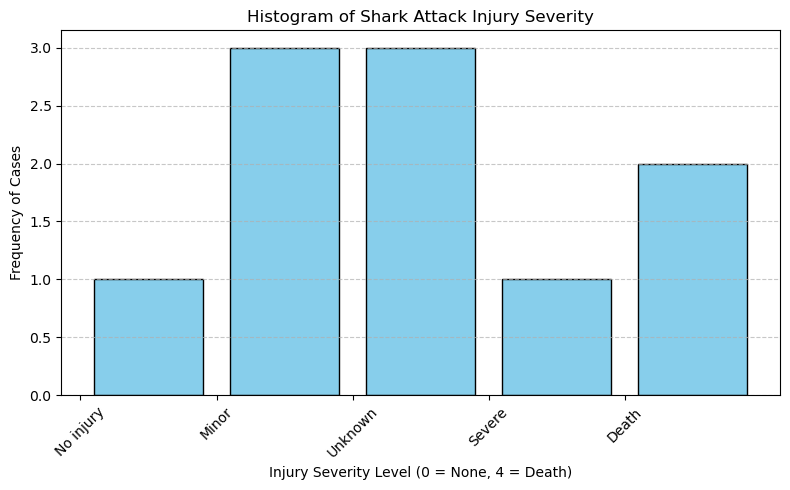

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Injury': [
        'Severe injuries to lower limbs',
        'Body found with shark bites. Possible drowning',
        'Calf severely bitten',
        'Left foot bitten',
        'Death by misadventure',
        'Right forearm and left hand injured',
        'Minor cuts to left thigh',
        'Disappeared',
        'Laceration to arm caused by metal object',
        'No injury to occupants, injury to shark attempted'
    ],
    'Injury Severity': [
        'Other/Unknown',
        'Death',
        'Severe injury',
        'Minor injury',
        'Death',
        'Other/Unknown',
        'Minor injury',
        'Other/Unknown',
        'Minor injury',
        'No injury'
    ],
    'Fatal Y/N': ['N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N']
}

df = pd.DataFrame(data)


severity_order = {
    'No injury': 0,
    'Minor injury': 1,
    'Other/Unknown': 2,
    'Severe injury': 3,
    'Death': 4
}
df['Severity Code'] = df['Injury Severity'].map(severity_order)


plt.figure(figsize=(8,5))
plt.hist(df['Severity Code'], bins=range(6), edgecolor='black', color='skyblue', rwidth=0.8)
plt.title('Histogram of Shark Attack Injury Severity')
plt.xlabel('Injury Severity Level (0 = None, 4 = Death)')
plt.ylabel('Frequency of Cases')
plt.xticks(range(5), ['No injury', 'Minor', 'Unknown', 'Severe', 'Death'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
# Save INJURY SEVERITY CLEANED file
df.to_csv("../data/interim/6_interim.fatality.csv", index=False)

df['Fatal Y/N'].describe()
# majority survive shark attacks !

count     561
unique      2
top         N
freq      450
Name: Fatal Y/N, dtype: object

In [40]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Age_clean,Injury Severity
0,25 Aug 2023,2023.0,Unknown,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,N,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",44,Other/Unknown
1,21 Aug-2023,2023.0,Unknown,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,Y,Morning,NaN,"The Tribune, 8/21/2023",25,Death
2,07-Jun-2023,2023.0,Unknown,BAHAMAS,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,N,13h00,Caribbean rreef shark,"J. Marchand, GSAF",73,Severe injury
3,02-Mar-2023,2023.0,Unknown,SEYCHELLES,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,N,Afternoon,Lemon shark,"Midlibre, 3/18/2023",6,Minor injury
4,18-Feb-2023,2023.0,Unknown,ARGENTINA,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,Y,NaN,NaN,"El Pais, 2/27/2023",32,Death


----------
### 'Date' CLEANING AND SEPERATE INTO DD MM YYYY COLUMNS

In [41]:
import pandas as pd
import re

# DataFrame with the 'Date' column
df = pd.read_csv(url)

# Function to parse dates-------------------------------------------------------------------------------------------------------------------
def parse_date(date_str):
    date_str = str(date_str).strip()
    
    # Remove 'Reported ' prefix
    date_str = re.sub(r'^Reported\s+', '', date_str, flags=re.IGNORECASE)
    
    # Patterns to match
    patterns = [
        r'(?P<DD>\d{1,2})[- ](?P<MM>[A-Za-z]+)[- ](?P<YYYY>\d{4})',  # DD MMM YYYY
        r'(?P<MM>[A-Za-z]+)[- ](?P<YYYY>\d{4})',                      # MMM-YYYY
        r'(?P<YYYY>\d{4})',                                           # YYYY only
    ]
    
    for pat in patterns:
        match = re.match(pat, date_str)
        if match:
            return match.groupdict()
    
    return {'DD': None, 'MM': None, 'YYYY': None}
#--------------------------------------------------------------------------------------------------------------------------------------------
# Call Function to the column
parsed_dates = df['Date'].apply(parse_date).apply(pd.Series)

# Merge back to original DataFrame
df = pd.concat([df, parsed_dates], axis=1)

# drop the column 'Date' and add the new columns DD MM YYYY
df = df.drop(columns=['Date'])

#
df = df[df["MM"] != "Early"]
df = df[df["MM"] != "Circa"]
df = df[df["MM"] != "Late"]
df = df[df["MM"] != "Before"]

# save added columns to our DataFrame
df.to_csv("../data/interim/7_interim_date.csv", index=False)
df.head()

,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,DD,MM,YYYY
0,2023.0,Unprovoked,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",25,Aug,2023
1,2023.0,Questionable,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,20/30,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023",21,Aug,2023
2,2023.0,Unprovoked,BAHAMAS,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF",07,Jun,2023
3,2023.0,Unprovoked,SEYCHELLES,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023",02,Mar,2023
4,2023.0,Questionable,ARGENTINA,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023",18,Feb,2023


In [42]:
import pandas as pd
import numpy as np
import re
# Clean the MM from 'NaN' and 'None'
df = df[df["MM"].notna() & (df["MM"] != "")]

# Replace full month names with abbreviations
df["MM"] = df["MM"].replace({
    "November": "Nov",
    "April": "Apr"
})

df['MM'].unique()

array(['Aug', 'Jun', 'Mar', 'Feb', 'Nov', 'Oct', 'Sep', 'Jul', 'Dec',
       'Apr', 'May', 'Jan'], dtype=object)

In [43]:

import pandas as pd
import numpy as np
import re

# DATA .csv
df = pd.read_csv(url)
# Function to parse dates-------------------------------------------------------------------------------------------------------------------
def parse_date(date_str):
    date_str = str(date_str).strip()
    
    # Remove 'Reported ' prefix
    date_str = re.sub(r'^Reported\s+', '', date_str, flags=re.IGNORECASE)
    
    # Patterns to match
    patterns = [
        r'(?P<DD>\d{1,2})[- ](?P<MM>[A-Za-z]+)[- ](?P<YYYY>\d{4})',  # DD MMM YYYY
        r'(?P<MM>[A-Za-z]+)[- ](?P<YYYY>\d{4})',                      # MMM-YYYY
        r'(?P<YYYY>\d{4})',                                           # YYYY only
    ]
    
    for pat in patterns:
        match = re.match(pat, date_str)
        if match:
            return match.groupdict()
    
    return {'DD': None, 'MM': None, 'YYYY': None}
#--------------------------------------------------------------------------------------------------------------------------------------------
# Call Function to the column
parsed_dates = df['Date'].apply(parse_date).apply(pd.Series)

# Merge back to original DataFrame
df = pd.concat([df, parsed_dates], axis=1)

# drop the column 'Date' and add the new columns DD MM YYYY
df = df.drop(columns=['Date'])

#
df = df[df["MM"] != "Early"]
df = df[df["MM"] != "Circa"]
df = df[df["MM"] != "Late"]
df = df[df["MM"] != "Before"]



In [44]:
import pandas as pd
import numpy as np
import re
# Clean the MM from 'NaN' and 'None'
df = df[df["MM"].notna() & (df["MM"] != "")]

# Replace full month names with abbreviations
df["MM"] = df["MM"].replace({
    "November": "Nov",
    "April": "Apr"
})

df['MM'].unique()

array(['Aug', 'Jun', 'Mar', 'Feb', 'Nov', 'Oct', 'Sep', 'Jul', 'Dec',
       'Apr', 'May', 'Jan'], dtype=object)

In [45]:

# Mapping month names to integers
month_map = {
    'Jan': 1, 'January': 1,
    'Feb': 2, 'February': 2,
    'Mar': 3, 'March': 3,
    'Apr': 4, 'April': 4,
    'May': 5,
    'Jun': 6, 'June': 6,
    'Jul': 7, 'July': 7,
    'Aug': 8, 'August': 8,
    'Sep': 9, 'Sept': 9, 'September': 9,
    'Oct': 10, 'October': 10,
    'Nov': 11, 'November': 11,
    'Dec': 12, 'December': 12
}

# Map MM column to integers; non-months become NaN
df['MM_clean'] = df['MM'].map(month_map)

# Drop non-month values
df_months_only = df.dropna(subset=['MM_clean']).copy()

# Convert to int
df_months_only['MM_clean'] = df_months_only['MM_clean'].astype(int)

# Compute percentages
mm_percent = df_months_only['MM_clean'].value_counts(normalize=True) * 100


# Compute counts from the cleaned DataFrame
mm_counts = df_months_only['MM_clean'].value_counts()

# Display results
print("Counts of months (MM_clean):")
print(mm_counts.sort_index())  # months in chronological order

mm_percent = df_months_only['MM_clean'].value_counts(normalize=True) * 100

# Round to 2 decimal places and add % sign
mm_percent_formatted = mm_percent.sort_index().map(lambda x: f"{x:.2f}%")

# Display
print("\nPercentage of each month (MM_clean):")
print(mm_percent_formatted)


Counts of months (MM_clean):
MM_clean
1     54
2     25
3     33
4     48
5     28
6     45
7     64
8     72
9     37
10    32
11    34
12    39
Name: count, dtype: int64

Percentage of each month (MM_clean):
MM_clean
1     10.57%
2      4.89%
3      6.46%
4      9.39%
5      5.48%
6      8.81%
7     12.52%
8     14.09%
9      7.24%
10     6.26%
11     6.65%
12     7.63%
Name: proportion, dtype: object


In [46]:
# frequency of shark attack in every month
df['MM'].value_counts()

MM
Aug    72
Jul    64
Jan    54
Apr    48
Jun    45
Dec    39
Sep    37
Nov    34
Mar    33
Oct    32
May    28
Feb    25
Name: count, dtype: int64

In [47]:
# Calculate percentage of shark attacks per month
percentages = df['MM'].value_counts(normalize=True) * 100

# Sort from high to low
percentages_sorted = percentages.sort_values(ascending=False)

# Format as 00.00%
percentages_formatted = percentages_sorted.map("{:.2f}%".format)

print(percentages_formatted)


MM
Aug    14.09%
Jul    12.52%
Jan    10.57%
Apr     9.39%
Jun     8.81%
Dec     7.63%
Sep     7.24%
Nov     6.65%
Mar     6.46%
Oct     6.26%
May     5.48%
Feb     4.89%
Name: proportion, dtype: object


In [5]:
import pandas as pd
import plotly.io as pio
import plotly.express as px

# Use VS Code renderer for inline display
pio.renderers.default = 'vscode'  # or 'iframe'

# Prepare data
df = pd.read_csv("../data/interim/7_interim_date.csv")
top_5 = df['MM'].value_counts().nlargest(5).reset_index()
top_5.columns = ['MM', 'Count']

# Create pie chart
fig = px.bar(
    top_5,
    x='MM',
    y='Count',
    title='Top 5 Months with Most Shark attacks',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

In [48]:
# Save DATE CLEANED file
df.to_csv("../data/interim/7_interim_date.csv", index=False)
df.head()

,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,DD,MM,YYYY,MM_clean
0,2023.0,Unprovoked,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",25,Aug,2023,8
1,2023.0,Questionable,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,20/30,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023",21,Aug,2023,8
2,2023.0,Unprovoked,BAHAMAS,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF",07,Jun,2023,6
3,2023.0,Unprovoked,SEYCHELLES,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023",02,Mar,2023,3
4,2023.0,Questionable,ARGENTINA,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023",18,Feb,2023,2


----
### VIEWING CHANGES

In [49]:
df.head(5)

,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,DD,MM,YYYY,MM_clean
0,2023.0,Unprovoked,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",25,Aug,2023,8
1,2023.0,Questionable,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,20/30,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023",21,Aug,2023,8
2,2023.0,Unprovoked,BAHAMAS,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF",07,Jun,2023,6
3,2023.0,Unprovoked,SEYCHELLES,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023",02,Mar,2023,3
4,2023.0,Questionable,ARGENTINA,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023",18,Feb,2023,2


In [50]:
df.columns

Index(['Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name',
       'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'DD',
       'MM', 'YYYY', 'MM_clean'],
      dtype='object')

In [51]:
import plotly.io as pio
import plotly.express as px

# Use VS Code renderer for inline display
pio.renderers.default = 'vscode'  # or 'iframe'

# Prepare data
top_5 = df['Country'].value_counts().nlargest(5).reset_index()
top_5.columns = ['Country', 'Count']

# Create pie chart
fig = px.pie(
    top_5,
    names='Country',
    values='Count',
    title='Top 5 Countries with Most Records',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()
